# SVM Iplementation for Classifying Datasets
<img src="https://blogs.elespectador.com/wp-content/uploads/2017/09/logo-Universidad-Nacional.png" 
     style="float: right; margin-right: 10px;" 
     width="130"
     />



<div style="text-align: left"> 
Valentina Orduz Bonilla <br>
Student of Mathematics <br>
Universidad Nacional de Colombia - Sede Bogotá <br>
</div>





In this notebook we are going to classify the next datasets using SVM:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

For that we are going to divide the process in the next six steps:

1) Specify which Machine Learning problem are we solving.

2) Provide a short summary of the features and the labels we are working on.

3) Answer the following questions: Are these datasets linearly separable?, are these datasets randomly chosen?, and the sample size is enough to guarantee generalization?

4) Provide an explanation how and why the code is working. 

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


In [ ]:
#Libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# Introduction

The idea of this notebook is to solve a supervised learning problem that consist of a binary classification task. We have a dataset with features and two labels and the objective is to give the appropiate label to data not seen before. We are going to work with two different datasets, so first let's understand each one.



# Banknote Authentication Data Set

2) The first dataset is extracted from images of genuine and forged banknotes and we want and algorithm that let us decide if a new banknote is authentic or not, that is, the labels are "genuine" or "forged".

In this dataset there are 1372 instances and 5 attributes or features but the last one is exactly the label we want to predict, therefore we have 4 features:

*   Variance of Wavelet Transformed image (continuous)
*   Skewness of Wavelet Transformed image (continuous)
*   Curtosis of Wavelet Transformed image (continuous)
*   Entropy of image (continuous)

To better understand the features let's start by looking what the Wavelet Transformed is. 

Wavelet transformed is a tool that allows us to make a detailed analysis of signals or sounds, or in the case of images, it allows us to filter out the noise. In general a Wavelet transformed decompose a signal using scaled and shifted versions of an specific wavelet (a wavelet is a signal or a waveform that has specific properties).

For more information you can visit [this page](https://towardsdatascience.com/the-wavelet-transform-e9cfa85d7b34). 


On the other hand, [entropy](https://faculty.ksu.edu.sa/sites/default/files/ref1_6.pdf) is a statistical measure of randomness that can be used to characterize the texture of an image.


3) Now we are going to estudy the data set. First we can begin seeing if there is enough data of both labels.












In [ ]:
#Save the dataset in such a way that we can call any feature
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                 sep = ',', 
                 header = None, 
                 names=["variance_of_Wavelet","skewness_of_Wavelet",
                        "curtosis_of_Wavelet","entropy",
                        "class"],
                 thousands = ',')
variables=["variance_of_Wavelet","skewness_of_Wavelet",
                        "curtosis_of_Wavelet","entropy"]

print("Dimensionality of the Dataframe:",df.shape)

Dimensionality of the Dataframe: (1372, 5)


In [ ]:
#Use the following lines to check that the data was saved properly 
#df
#print(df.loc[0].at["variance_of_Wavelet"])


In [ ]:
print("Class Percentage:")
df["class"].value_counts(normalize=True)

Class Percentage:


0    0.555394
1    0.444606
Name: class, dtype: float64

Approximately 55% of the data has the label 0 and 45% the label 1. After that, it is important to compare the features, for that we can visualize them in pairs.  

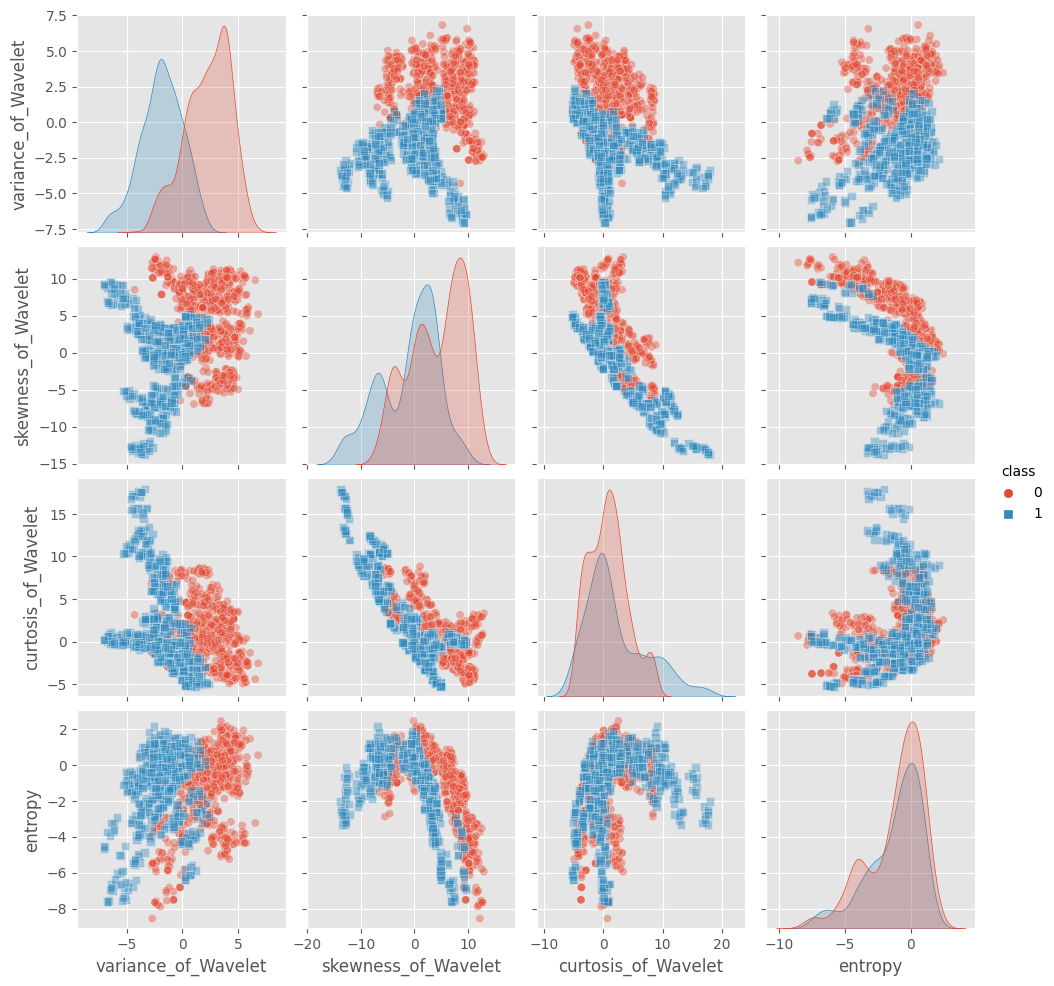

In [ ]:
#Scatter matrix
sns.pairplot(df, hue="class",plot_kws={'alpha':0.4},markers=["o", "s"])
plt.show()

additionally, it is important to know how much each attribute correlates with the class. 





In [ ]:
df.corr()["class"].sort_values(ascending=False)

class                  1.000000
curtosis_of_Wavelet    0.155883
entropy               -0.023424
skewness_of_Wavelet   -0.444688
variance_of_Wavelet   -0.724843
Name: class, dtype: float64

This let us see that the most correlated variable is the variance of Walavet, and the less correlated is the entropy. 

Now, it's necesary to know if the dataset is linearly separable, for that we can use Perceptron method. As we will see later, the accuracy of the Perceptron method in the train data is not of 100%, that is why we can say that the set is not linearly separable. 


#Occupancy Detection Data Set

2) The second data set was obtained from  time stamped pictures that were taken every minute. In this case we want to decide between the labels "occupied" 0 or "not occupied" 1.

There are 20560 instances and 6 attributes or features: 



*   Date time year-month-day hour:minute:second
*   Temperature, in Celsius
*   Relative Humidity, %
*   Light, in Lux
*   CO2, in ppm
*   Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

In the dataset again appears one more instance that matches with the labels we want 0 or 1, 0 for not occupied, 1 for occupied status.




3)First we are going to study and understand the dataset. In this case the dataset is already divided in three sets, data training, data test 1 and data test 2.  

In [ ]:
#Save the dataset in such a way that we can call any feature

from pathlib import Path
import urllib.request
import zipfile
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

def load_occupancy_data():
    tarball_path = Path("datasets/occupancy_data.zip")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
        urllib.request.urlretrieve(url, tarball_path)
        with zipfile.ZipFile(tarball_path) as occupancy_tarball:
           # open the csv file in the dataset
           occupancy_tarball.extractall(path="datasets")
    list_df =[pd.read_csv(Path("datasets/datatraining.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest2.txt"),parse_dates=['date'],date_parser=dateparse),]
    return list_df

In [ ]:
train, test1, test2= load_occupancy_data()


Now let's see the size and how much data there is of each class in the three sets.

In [ ]:
from tabulate import tabulate

class_train=train['Occupancy'].value_counts(normalize=True)
class_test1=test1['Occupancy'].value_counts(normalize=True)
class_test2=test2['Occupancy'].value_counts(normalize=True)

data = [["train",train.shape[0],class_train[0],class_train[1]], ["test1",test1.shape[0],class_test1[0],class_test1[1]], ["test1",test2.shape[0],class_test2[0],class_test2[1]]]

col_names = ["shape","Porcentage 0", "Porcentage 1"]
print(tabulate(data, headers=col_names))
#class_train[1]

         shape    Porcentage 0    Porcentage 1
-----  -------  --------------  --------------
train     8143        0.78767         0.21233
test1     2665        0.635272        0.364728
test1     9752        0.789889        0.210111


We found here a data imbalance, because there is a big gap between labels 1 and 0. 

If we study the features, the first one is a date, therefore it is necessary to study this information to know if it is relevant, and if yes, look for a numerical representation.

In [ ]:
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#figures = [ px.line(train, x='date', y="Occupancy", width=800, height=400),
#         px.line(test1, x='date', y="Occupancy",
#                 width=800, height=400),
#            px.line(test2, x='date', y="Occupancy",
#                         width=800, height=400) ]

#fig = make_subplots(rows=2, cols=2,
#                    specs=[[{"colspan": 2}, None],[{}, {}]],
#                    subplot_titles=("Train Date","Test1 Date", "Test2 Date")) 

#fig.append_trace(figures[0]["data"][trace], row=1, col=1)
#fig.append_trace(figures[1]["data"][trace], row=2, col=1)
#fig.append_trace(figures[2]["data"][trace], row=2, col=2)

#fig.show()


figures = [ px.line(train, x='date', y="Occupancy", width=800, height=400),
         px.line(test1, x='date', y="Occupancy",
                 width=800, height=400),
            px.line(test2, x='date', y="Occupancy",
                         width=800, height=400) ]

print('train Date')
figures[0].show()

print('test 1 Date')
figures[1].show()

print('test 2 Date')
figures[2].show()



train Date


test 1 Date


test 2 Date


The previous graphs show the occupancy in relation with the date. On one side the day is relevant because on weekends or holidays the label is 0, but on the other the hours and minutes are also important because we can see that the occupancy is related with some office hours, people enter between 7:40 and 8:40, and the bank is empty after 18:10 or 18:15. We also notice that the seconds aren't so relevant, so for the moment the seconds are going to be ignored. 

In order to use this data, we are going to transform each date into a year unit as follows:

$$number=year+\frac{month}{12}+\frac{day}{365}+\frac{hour}{8760}+\frac{minutes}{525600}.$$

All the data was taken in February of the same year so we could not take in count the month, but for the moment we are going to use it.

In [ ]:
train['date_numeric'] = train['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
test1['date_numeric'] = test1['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
test2['date_numeric'] = test2['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)

With this we can define a new dataset.

In [ ]:
variables2 = ['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio', 'Occupancy']

 Lets do the same analisys we did with the previous dataset, we start visualizing them in pairs.

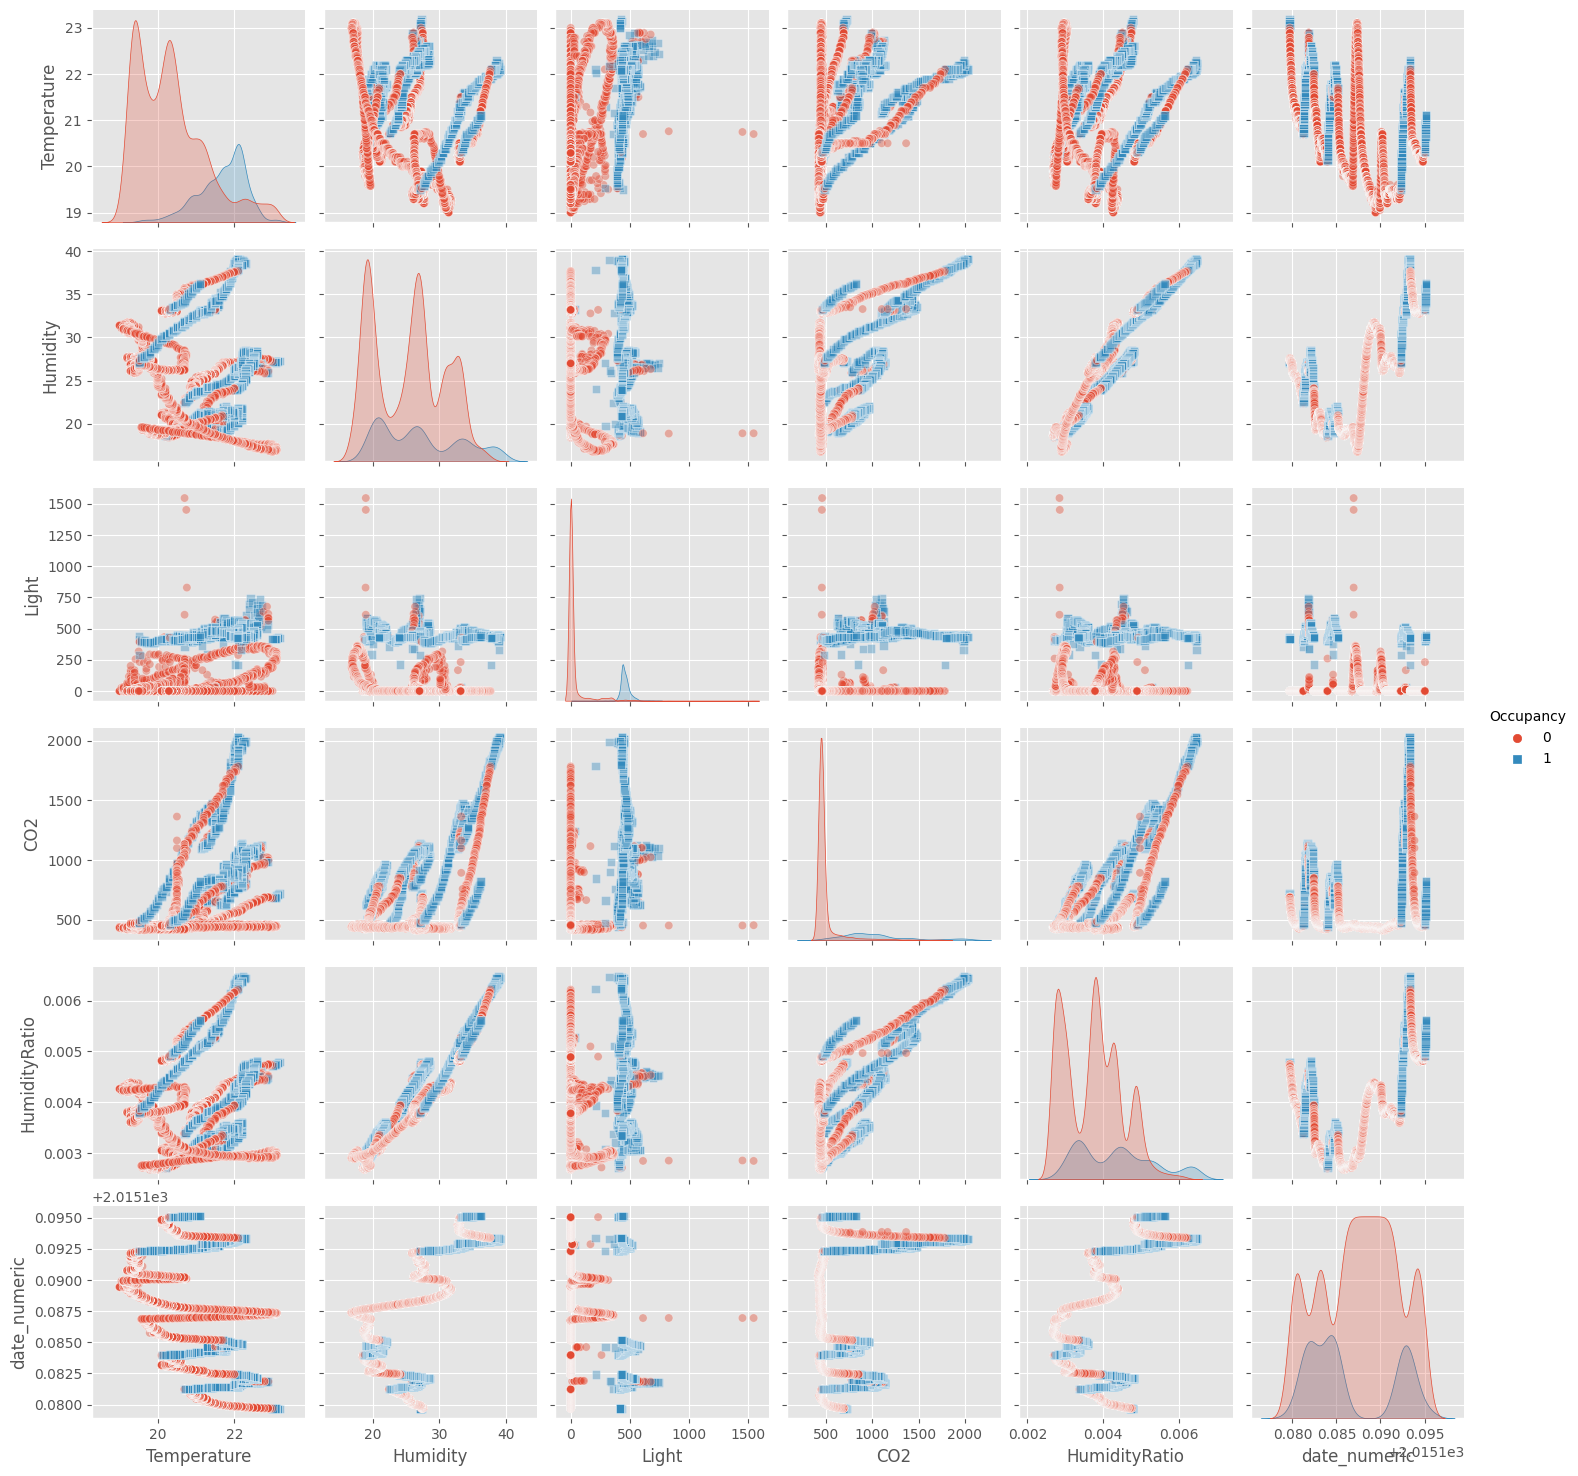

In [ ]:
#Scatter matrix
sns.pairplot(train, hue='Occupancy',plot_kws={'alpha':0.4},markers=["o", "s"])
plt.show()

There are some things we can observe from the graphics. If we see the light column, in all the cases when there is a higher light, the label is 1. For the rest of the features it isn´t so clear the classification. 

Applying again Perceptron method we don´t have a 100% of accuracy with the train set, with make us believe that the set is not separable. 

#Dataset Division

BANKNOTE AUTHENTICATION

To use the different models we have to divide the dataset in two parts, the training set (80%) and the testing set (20%).

In [ ]:
train_set_df, test_set_df= train_test_split(df, test_size=0.2,random_state=42)

In [ ]:
#Definition of the features X and the labels y for training
X=train_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y=train_set_df["class"]
#df.keys()

In [ ]:
 #Definition of the features X_test and the labels y_test for testing
X_test=test_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y_test=test_set_df['class']

OCCUPANCY DETECTION

In this case the data set is already separated for training and two testing sets.

In [ ]:

X_train_o=train[['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_train_o=train['Occupancy']
#df.keys()

In [ ]:
X_test1_o=test1[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio']]
y_test1_o=test1['Occupancy']

In [ ]:
X_test2_o=test2[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio']]
y_test2_o=test2['Occupancy']

#Perceptron Method

As we said before, we are going to apply this metod to study if the sets are linearly separable or not.

BANKNOTE AUTHENTICATION

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn import svm

In [ ]:
#Perceptron

clf_p = Perceptron(tol=1e-3, random_state=0)
clf_p.fit(X, y)
print('Accuracy training set:')

clf_p.score(X, y)
     

Accuracy training set:


0.96718322698268

If we calculate the accuracy with the trainig dataset we obtain 96.7% that isn't the 100% that we should have if the data were linearly separable.

In [ ]:
predicted_perceptron_test=clf_p.predict(X_test)

#Accuracy measure for the testing dataset

accuracy_test= accuracy_score(y_test, predicted_perceptron_test).round(2)
conf_matrix_test= confusion_matrix(y_test, predicted_perceptron_test)

print('Accuracy testing set:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Accuracy testing set: 0.95
Confusion matrix:
 [[145   3]
 [ 12 115]]


In [ ]:
X_total=df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y_total=df["class"]
clf_p.fit(X_total, y_total)

conf_matrix_total= confusion_matrix(y_total, clf_p.predict(X_total))
print('Confusion matrix:\n', conf_matrix_total)
print('Accuracy total set:')
clf_p.score(X, y)


Confusion matrix:
 [[752  10]
 [  6 604]]
Accuracy total set:


0.9890610756608933

OCCUPANCY DETECTION

In [ ]:
clf_p.fit(X_train_o, y_train_o)
print('Accuracy training set:')
clf_p.score(X_train_o, y_train_o)



Accuracy training set:


0.9711408571779443

In [ ]:
#train1
predicted_perceptron_test1_o=clf_p.predict(X_test1_o)
print('Accuracy testing set 1:')
clf_p.score(X_test1_o, y_test1_o)

Accuracy testing set 1:


0.9534709193245778

In [ ]:
#accuracy_test1_o= accuracy_score(y_test1_o, predicted_perceptron_test1_o).round(2)
conf_matrix_test1_o= confusion_matrix(y_test1_o, predicted_perceptron_test1_o)
#print('Accuracy:',accuracy_test1_o)
print('Confusion matrix:\n', conf_matrix_test1_o)

Confusion matrix:
 [[1648   45]
 [  79  893]]


In [ ]:
#train2
predicted_perceptron_test2_o=clf_p.predict(X_test2_o)
print('Accuracy testing set 2:')
clf_p.score(X_test2_o, y_test2_o)

Accuracy testing set 2:


0.9818498769483183

In [ ]:
#accuracy_test2_o= accuracy_score(y_test2_o, predicted_perceptron_test2_o).round(2)
conf_matrix_test2_o= confusion_matrix(y_test2_o, predicted_perceptron_test2_o)
#print('Acuracy:',accuracy_test2_o)
print('Confusion matrix:\n', conf_matrix_test2_o)

Acuracy: 0.99
Confusion matrix:
 [[7659   44]
 [ 133 1916]]


As we don't have an accurancy of 100%, we can say that the datasets are not linearly separable

#SVM implementation (with scikit Learn)

BANKNOTE AUTHENTICATION

Now we are going to implement Support Vector Machine to the datasets, lets start with the Bancnote Authentication. 

In [ ]:
#Implementation of the module
from sklearn import svm
clf= svm.SVC()
clf.fit(X, y)

SVC()

In [ ]:
predicted_svm= clf.predict(X)
predicted_svm_test=clf.predict(X_test)

In [ ]:
#Accuracy measure for the training set
accuracy_train= accuracy_score(y, predicted_svm).round(2)
conf_matrix_train= confusion_matrix(y , predicted_svm)

In [ ]:
print('Accuracy:', accuracy_train)
print('Confusion matrix:\n', conf_matrix_train)

Accuracy: 1.0
Confusion matrix:
 [[609   5]
 [  0 483]]


In [ ]:
#Accuracy measure for the testing dataset
accuracy_test= accuracy_score(y_test, predicted_svm_test).round(2)
conf_matrix_test= confusion_matrix(y_test, predicted_svm_test)

In [ ]:
print('Accuracy:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Accuracy: 1.0
Confusion matrix:
 [[148   0]
 [  0 127]]


We can see that the method has a 100% accuracy

OCCUPANCY DETECTION

In [ ]:
clf.fit(X_train_o, y_train_o)

SVC()

In [ ]:
predicted_svm_train_o= clf.predict(X_train_o)
predicted_svm_test1_o=clf.predict(X_test1_o)
predicted_svm_test2_o=clf.predict(X_test2_o)

In [ ]:
#Accuracy measure for the training set
accuracy_train_o= accuracy_score(y_train_o, predicted_svm_train_o).round(2)
conf_matrix_train_o= confusion_matrix(y_train_o, predicted_svm_train_o)

print('Accuracy:',accuracy_train_o)
print('Confusion matrix train set:\n', conf_matrix_train_o)

Accuracy: 0.99
Confusion matrix train set:
 [[6336   78]
 [  30 1699]]


In [ ]:
accuracy_test1_o= accuracy_score(y_test1_o, predicted_svm_test1_o).round(2)
conf_matrix_test1_o= confusion_matrix(y_test1_o, predicted_svm_test1_o)

print('Accuracy:',accuracy_test1_o)
print('Confusion matrix test1 set:\n', conf_matrix_test1_o)

Accuracy: 0.98
Confusion matrix test1 set:
 [[1641   52]
 [  13  959]]


In [ ]:
accuracy_test2_o= accuracy_score(y_test2_o, predicted_svm_test2_o).round(2)
conf_matrix_test2_o= confusion_matrix(y_test2_o, predicted_svm_test2_o)

print('Accuracy:',accuracy_test2_o)
print('Confusion matrix test2 set:\n', conf_matrix_test2_o)

Accuracy: 0.99
Confusion matrix test2 set:
 [[7566  137]
 [   8 2041]]


We can see that in the two testing sets there are more false positives than false negatives, we can relate this with the fact that in the training dataset only 21% of the data has the label 1, wich means, the model has less information to predict this label.

A good option is to find some way to fix this imbalance. 

We also obtain a really high accuracy, 98% or more. 

# Model Explanation

 Next, we can found the code with some comments that explain how does the code for SVM works when we have only two features. 

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/


class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #We define the colors of the associated classes, where red is for the forged banknotes and blue for the genuine ones
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train (optimization part)
    def fit(self, data):
        self.data = data
        # We define this dictionary to save the values { ||w||: [w,b] }
        opt_dict = {}

        # Transforms that we are going to apply to the vector w to optimize w
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        #Reconstruction of the dataset (only the characteristic) where the first value is the label and then the vectors that represent the features, to take max and min feature value
        #of the dataset take all the features
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1

        #We start looking a good value using big steps (0.1), after we find a good one we use smaller steps (0.01) and then we repeat the process 
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps 
        # with b as we do w
        b_multiple = 5
        # latest_optimum is going to be the first element in vector w
        latest_optimum = self.max_feature_value*10


        #We want the minimum magnitude of w and the maximum b

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            #While va a funcionar siempre que no esté optimizado, por eso en la anterior linea definimos optimized as false
            while not optimized:
              #we take b from -the maximum value to the maximum value in steps 
              #of 5 times the steps of w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                      #We multiply w with the vectors of transformation component to component
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                          #for all data we are going to verify, so if there is 
                          #at least one i that doesn't meet the condition, then we return false
                            for xi in self.data[i]:
                                #we only change the label's name
                                yi=i
                                # Verifiy constraints, if it doesn't meet the 
                                #condition then it doesn't save the value
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm for the ones who meet the condition
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                #w da la pendiente de la recta y la distancia entre los soportes
                #¿POR QUÉ? basta revisar los positivos para estudiar todas las posibles opciones, pues w<0 repiten casos que ya se vieron
                if w[0] < 0:
                  # it appears  "Optimized a step" when we finish the while of the first step
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            #norms is vector of all the values of opt_dict organized from the smallest
            #to the biggest, so norms[0] is going to be the smallest 
            #so we take the smallest w of the list and we use it to define latest_optimum that 
            #is going to be the new component of w
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]] #el de norma más chiquita
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            #opt_choice[0] is w and opt_choice[0][0] is the fisrt component of w
            latest_optimum = opt_choice[0][0]+step*2


            
            
    #Gives the data to predict and returns the label of it
    def predict(self,features):
        # The classification depends on the sign of x.w+b (x:np.array(features) w:self.w  b:self.b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    #We add two lines: if x.w+b is different from 0 then we mark it with a star of the corresponging color
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    #Now we define a function that let us see the data in the corresponding color and the decision boundary
    def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
      
      def hyperplane(x,w,b):
        return (-w[0]*x-b) / w[1]

      #We define the graph domain depending on the smallest and biggest value of x
      range = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min=range[0]
      hyp_x_max=range[1]

      sv1=hyperplane(hyp_x_min, self.w, self.b)
      sv2=hyperplane(hyp_x_max, self.w, self.b)
      self.ax.plot([hyp_x_min,hyp_x_max],[sv1,sv2], "g")

      plt.show()

        



# Model Testing

 We are going to prove this code with the next data set that is linearly separable. 

Optimized a step.
Optimized a step.
Optimized a step.


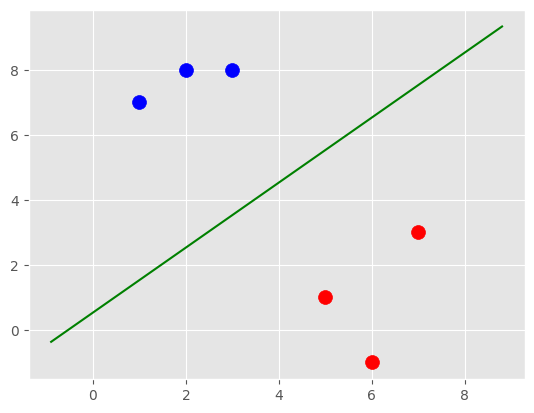

In [ ]:
#Small example of dataset with the two labels 1 and -1        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data=data_dict)
svm1.visualize()

#Let's see the grah of the last dataset 
#plt.scatter(data_dict[-1][:, 0], data_dict[-1][:, 1], c = 'b')
#plt.scatter(data_dict[1][:, 0], data_dict[1][:, 1], c = 'r')

Optimized a step.
Optimized a step.
Optimized a step.


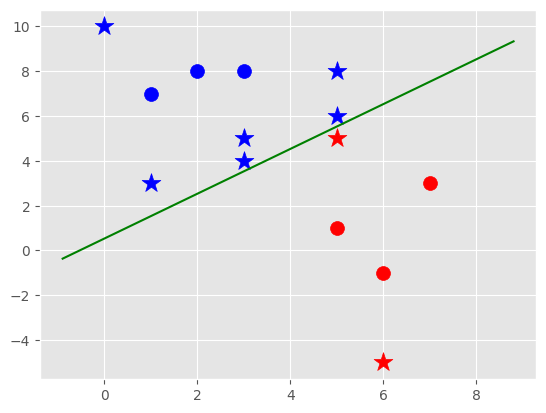

In [ ]:
#Let's make the graph of the decision hyperplane
#x =np.linspace(1,7,2)
#w = svm1.w
#b = svm1.b
#y = (-b-w[0]*x)/w[1]

#plt.scatter(data_dict[-1][:,0],data_dict[-1][:,1],c="b")
#plt.scatter(data_dict[1][:,0],data_dict[1][:,1],c="r")
#plt.plot(x,y,c="green")

#plt.show()

#Now we are going to predict the labels of new values

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()


In [ ]:
svm1.predict([7,3.5])

1.0

#Fixing the code

Now lets try to change the code for this to work with more than two features and givinig hiperplanes with any slope.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #We define the colors of the associated classes, where red is for the forged banknotes and blue for the genuine ones
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train (optimization part) d:number of directions
    def fit1(self, data, d):
        self.data = data
        # We define this dictionary to save the values { ||w||: [w,b] }
        opt_dict = {}

        # Transforms that we are going to apply to the vector w to optimize w
        transforms = []
        rad=d*np.pi/180
        for angle in np.arange(0,2*np.pi,rad):
          transforms.append([np.cos(angle), np.sin(angle)])

        

        #Reconstruction of the dataset (only the characteristic) where the first value is the label and then the vectors that represent the features, to take max and min feature value
        #of the dataset take all the features
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1

        #We start looking a good value using big steps (0.1), after we find a good one we use smaller steps (0.01) and then we repeat the process 
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps 
        # with b as we do w
        b_multiple = 5
        # latest_optimum is going to be the first element in vector w
        latest_optimum = self.max_feature_value*10


        #We want the minimum magnitude of w and the maximum b

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            #While va a funcionar siempre que no esté optimizado, por eso en la anterior linea definimos optimized as false
            while not optimized:
              #we take b from -the maximum value to the maximum value in steps 
              #of 5 times the steps of w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                      #We multiply w with the vectors of transformation component to component
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                          #for all data we are going to verify, so if there is 
                          #at least one i that doesn't meet the condition, then we return false
                            for xi in self.data[i]:
                                #we only change the label's name
                                yi=i
                                # Verifiy constraints, if it doesn't meet the 
                                #condition then it doesn't save the value
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm for the ones who meet the condition
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                #w da la pendiente de la recta y la distancia entre los soportes
                #¿POR QUÉ? basta revisar los positivos para estudiar todas las posibles opciones, pues w<0 repiten casos que ya se vieron
                if w[0] < 0:
                  # it appears  "Optimized a step" when we finish the while of the first step
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            #norms is vector of all the values of opt_dict organized from the smallest
            #to the biggest, so norms[0] is going to be the smallest 
            #so we take the smallest w of the list and we use it to define latest_optimum that 
            #is going to be the new component of w
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]] #el de norma más chiquita
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            #opt_choice[0] is w and opt_choice[0][0] is the fisrt component of w
            latest_optimum = opt_choice[0][0]+step*2


            
            
    #Gives the data to predict and returns the label of it
    def predict(self,features):
        # The classification depends on the sign of x.w+b (x:np.array(features) w:self.w  b:self.b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    #We add two lines: if x.w+b is different from 0 then we mark it with a star of the corresponging color
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    #Now we define a function that let us see the data in the corresponding color and the decision boundary
    def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
      
      def hyperplane(x,w,b):
        return (-w[0]*x-b) / w[1]

      #We define the graph domain depending on the smallest and biggest value of x
      range = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min=range[0]
      hyp_x_max=range[1]

      sv1=hyperplane(hyp_x_min, self.w, self.b)
      sv2=hyperplane(hyp_x_max, self.w, self.b)
      self.ax.plot([hyp_x_min,hyp_x_max],[sv1,sv2], "g")

      plt.show()

        



Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.


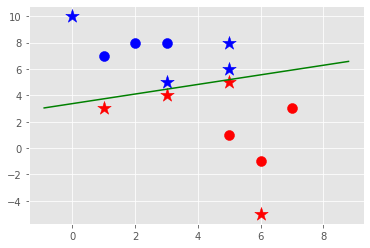

In [ ]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit1(data_dict , 10)
#svm1.fit1(data=data_dict, 2)
#svm1.visualize()

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm1.predict(p)

svm1.visualize()



Optimized a step.
Optimized a step.
Optimized a step.


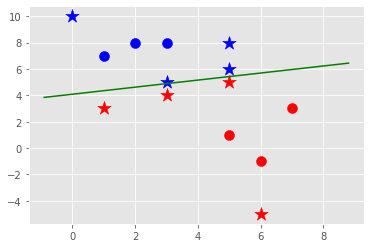

In [ ]:
try_data= {-1:np.array([[3,7],
                          [1,2],
                          [1,5],]),
             
             1:np.array([[5,1],
                         [6,7],
                         [6,4],])}

svm1 = Support_Vector_Machine()
svm1.fit1(data_dict , 15)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm1.predict(p)

svm1.visualize()

#Referencias

[1] Harvard University. (n.d.). Lecture 13: Sampling and Data Collection [PDF document]. Retrieved from https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture13.pdf <br>
[2] MathWorks. (n.d.). Entropy. Retrieved from https://la.mathworks.com/help/images/ref/entropy.html <br>
[3] UCI Machine Learning Repository. (2012). Occupancy Detection Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection <br>
[4] UCI Machine Learning Repository. (n.d.). Banknote Authentication Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/banknote+authentication